# Spark Job Output Analysis

In [8]:
import datetime

import pandas as pd
from util.csv_tool import MergedDataFrameReader

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb

### Total Events

We first explore event patterns aggregated by days

In [2]:
columns = ['num_views', 'num_carts', 'num_remove_from_carts', 'num_purchases', 'num_events', 'date']

In [97]:
reader = MergedDataFrameReader('../output/exploreTotalEvents/eventsAggByDay.csv', columns)
total_events_df = reader.read_csvs_as_one()
total_events_df[columns[0:-1]] = total_events_df[columns[0:-1]].apply(pd.to_numeric)
total_events_df['date'].apply(pd.to_datetime)
total_events_df['date'] = pd.DatetimeIndex(total_events_df['date'])
total_events_df.head()

,num_views,num_carts,num_remove_from_carts,num_purchases,num_events,date
0,1629581,73045,0,27525,1730151,2020-01-13
1,2505178,124014,0,41579,2670771,2020-04-24
2,1619593,72240,0,26059,1717892,2020-01-11
0,1584010,72518,0,27403,1683931,2020-01-29
1,1730397,101668,0,28426,1860491,2020-02-07


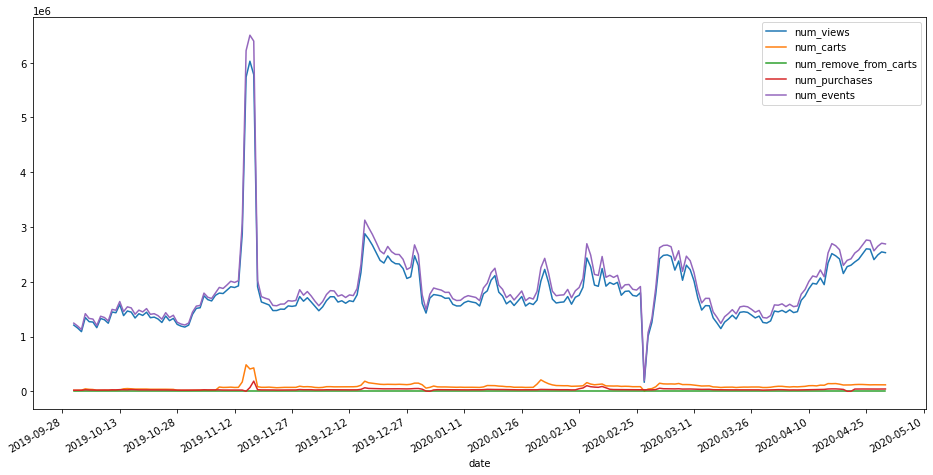

In [101]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
ax = sb.lineplot(data=total_events_df.set_index('date'), dashes=False)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gcf().autofmt_xdate()
plt.show()